In [1]:
import json
import matplotlib.pyplot as plt
from lg_agent import Agent, TASK_DICO
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [2]:
META = "llama3.2:3b"
MODEL_NAME = META

In [3]:
with open("data/test_data.json", "r") as f:
    test_cases = json.load(f)
expected_task = []
predict_task = []
for i, test_case in enumerate(test_cases):
    question = test_case["input"]
    expected = test_case["expected_task"].strip()
    model = ChatBotMl(MODEL_NAME)
    _, task = model.run(question)
    if task.strip() != expected:
        print(question, task.strip(), expected, i)
    expected_task.append(expected)
    predict_task.append(task.strip())
print(f'Taux de bonne prédiction de tache {100 * accuracy_score(y_true=expected_task, y_pred=predict_task)}%')

/Users/liamdro/PycharmProjects/MultiNlpAgent/main.py:41: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(llm=self.model, prompt=prompt)
/Users/liamdro/PycharmProjects/MultiNlpAgent/main.py:42: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = ZeroShot

Detect emotions: My emotions are all over the place: sadness, anger, and some relief. sentiment_analysis emotion_analysis 14
Identify emotional states in: I feel a deep sense of gratitude towards my caregivers. sentiment_analysis emotion_analysis 16
Determine emotional tone: The fear and anxiety are almost unbearable before each scan. sentiment_analysis emotion_analysis 17
How does this text feel emotionally: There’s a heavy feeling of grief after losing my pet. sentiment_analysis emotion_analysis 19
Taux de bonne prédiction de tache 88.57142857142857%


In [4]:
print(classification_report(expected_task, predict_task, digits=2))

                    precision    recall  f1-score   support

  emotion_analysis       1.00      0.60      0.75        10
      ner_analysis       1.00      1.00      1.00        15
sentiment_analysis       0.71      1.00      0.83        10

          accuracy                           0.89        35
         macro avg       0.90      0.87      0.86        35
      weighted avg       0.92      0.89      0.88        35



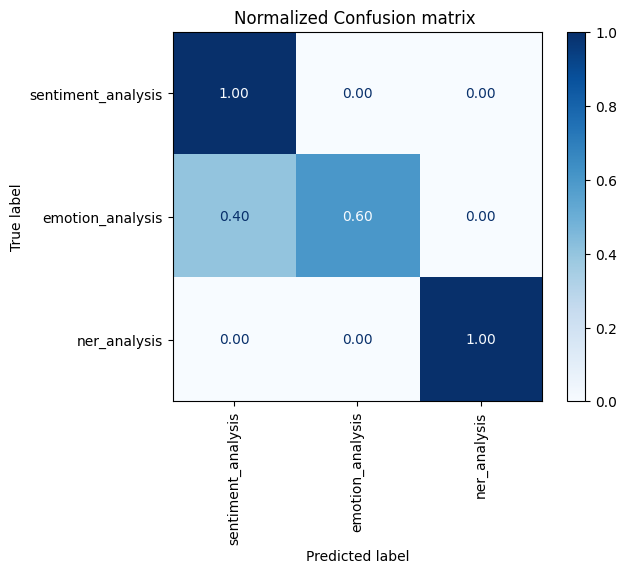

In [5]:
clf_classes = [key for key in TASK_DICO.keys()]
conf_mat_norm = confusion_matrix(expected_task, predict_task, normalize='true', labels=clf_classes)
disp_norm = ConfusionMatrixDisplay(confusion_matrix=conf_mat_norm, display_labels=clf_classes)
disp_norm.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Normalized Confusion matrix ")
plt.grid(False)
plt.xticks(rotation=90)
plt.show()